# 色々なネットワークとその行列行限
ネットワーク解析の基礎を学びます。

networkxの読み込み

In [1]:
import networkx as nx

その他のライブラリ

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

## ネットワークの例と描画
ネットワークはノードと点の集合です。

### 無向ネットワーク

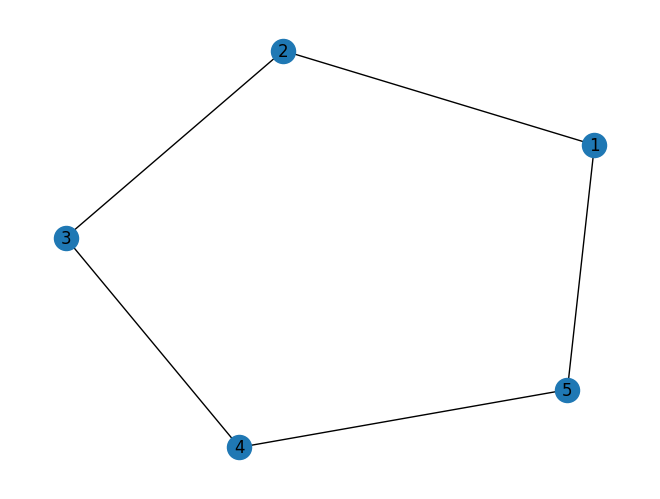

In [3]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# ネットワークの描画
nx.draw(g, with_labels=True)

ノード数: ネットワークサイズ

In [4]:
# ノード数の取得
nb_nodes = g.number_of_nodes()
# または
nb_nodes = len(g)

print(f"ノード数: {nb_nodes}")

ノード数: 5


エッジ数

In [5]:
# エッジ数の取得
nb_edges = g.number_of_edges()
# または
nb_edges = len(g.edges)
# または
nb_edges = g.size()

print(f"エッジ数: {nb_edges}")

エッジ数: 5


### 有向ネットワーク

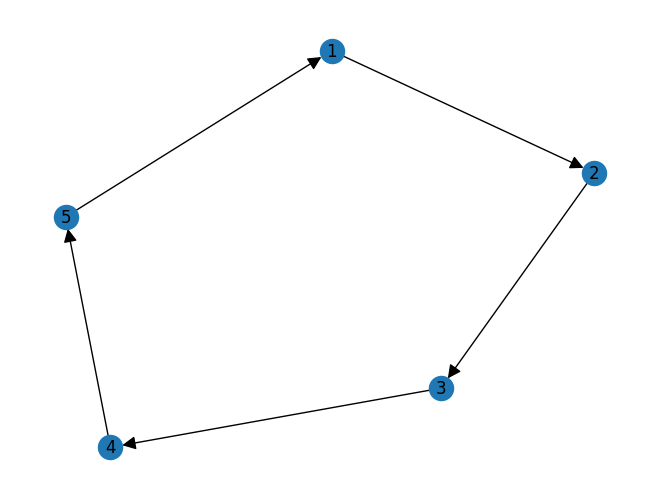

In [6]:
from math import gcd
g = nx.DiGraph()  # 有向グラフの場合は nx.DiGraph() を使用
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# ネットワークの描画
nx.draw(g, with_labels=True, arrowstyle='-|>', arrowsize=20) # 有向グラフの矢印を表示

### 重み付きネットワーク

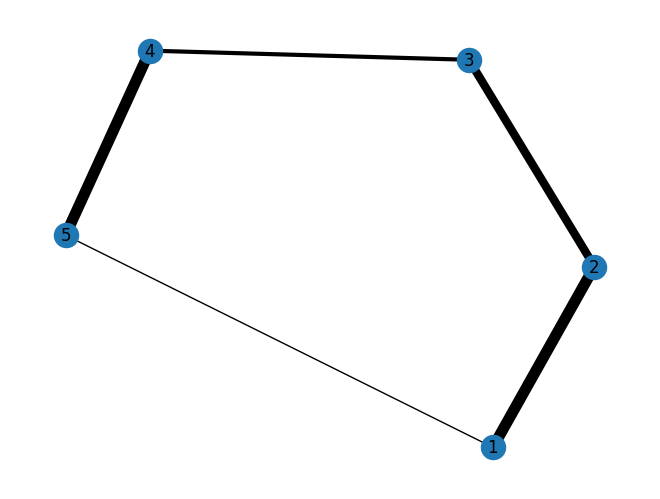

In [7]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# エッジに乱数で重みを割り振る
for u, v in g.edges():
    g[u][v]['weight'] = random.randint(1, 10)

# ネットワークの描画
edge_width = [g[u][v]['weight'] for u, v in g.edges()] # エッジの太さをリストで指定
nx.draw(g, with_labels=True, width=edge_width)

### 2部ネットワーク

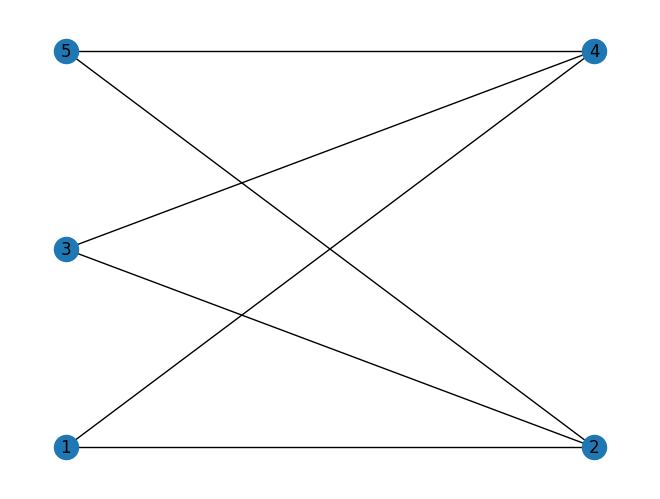

In [8]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (1, 4), (3, 2), (3, 4), (5, 2), (5, 4)])

# ノードのグループ分け
group0 = [1, 3, 5]
group1 = [2, 4]
g.add_nodes_from(group0, bipartite=0)
g.add_nodes_from(group1, bipartite=1)

# ネットワークの描画
nx.draw(g, nx.bipartite_layout(g, group0), with_labels=True)

## 隣接行列
### 無向ネットワークの場合

In [9]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# 隣接行列
nx.adjacency_matrix(g).toarray() # numpy array 形式で取得(デフォルトでは疎行列（sparse matrix）形式で返すため)

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

### 有向ネットワークの場合

In [10]:
# ネットワークの定義
G = nx.DiGraph()  # 有向グラフの場合は nx.DiGraph() を使用
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# 隣接行列
nx.adjacency_matrix(G).toarray()

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

### 重み付きネットワークの場合

In [11]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# エッジに乱数で重みを割り振る
for u, v in g.edges():
    g[u][v]['weight'] = random.randint(1, 10)

# 重み付き隣接行列
nx.adjacency_matrix(g, weight='weight').toarray()

array([[0, 4, 0, 0, 6],
       [4, 0, 4, 0, 0],
       [0, 4, 0, 8, 0],
       [0, 0, 8, 0, 5],
       [6, 0, 0, 5, 0]])

### 2部ネットワーク

In [12]:
# ネットワークの定義
g = nx.Graph()
g.add_edges_from([(1, 2), (1, 4), (3, 2), (3, 4), (5, 2), (5, 4)])

# ノードのグループ分け
group0 = [1, 3, 5]
group1 = [2, 4]
g.add_nodes_from(group0, bipartite=0)
g.add_nodes_from(group1, bipartite=1)

# 接続行列
nx.bipartite.biadjacency_matrix(g, group0).toarray()

array([[1, 1],
       [1, 1],
       [1, 1]])

In [13]:
# 隣接行列
adj_matrix = nx.adjacency_matrix(g).toarray()

# 接続行列と隣接行列の関係がわかりやすいようにノードの順番を入れ替える
new_order = [0,3,4,1,2]
adj_matrix = adj_matrix[new_order, :][:, new_order]

print(adj_matrix)

[[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [1 1 1 0 0]
 [1 1 1 0 0]]
